<a href="https://colab.research.google.com/github/IYashCanCode/Bank-Churn/blob/main/Bank_Churn_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from tqdm import tqdm
from statsmodels.graphics.gofplots import qqplot

In [ ]:
bank_data = pd.read_csv('BankChurners.csv')

In [ ]:
bank_data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
bank_data.shape

(10127, 23)

In [ ]:
list(enumerate(bank_data.columns))

[(0, 'CLIENTNUM'),
 (1, 'Attrition_Flag'),
 (2, 'Customer_Age'),
 (3, 'Gender'),
 (4, 'Dependent_count'),
 (5, 'Education_Level'),
 (6, 'Marital_Status'),
 (7, 'Income_Category'),
 (8, 'Card_Category'),
 (9, 'Months_on_book'),
 (10, 'Total_Relationship_Count'),
 (11, 'Months_Inactive_12_mon'),
 (12, 'Contacts_Count_12_mon'),
 (13, 'Credit_Limit'),
 (14, 'Total_Revolving_Bal'),
 (15, 'Avg_Open_To_Buy'),
 (16, 'Total_Amt_Chng_Q4_Q1'),
 (17, 'Total_Trans_Amt'),
 (18, 'Total_Trans_Ct'),
 (19, 'Total_Ct_Chng_Q4_Q1'),
 (20, 'Avg_Utilization_Ratio'),
 (21,
  'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'),
 (22,
  'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2')]

In [ ]:
bank_data.iloc[:,0:10].head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21


In [ ]:
bank_data.iloc[:,10:23].head()

,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
print('Brief about the data columns:')

meta_data_columns =  bank_data.columns.to_list()
meta_data_info    = ['Client number. Unique identifier for the customer holding the account',
                     'Internal event (customer activity) variable - if the account is closed then 1 else 0',
                     'Demographic variable - Customer\'s Age in Years',
                     'Demographic variable - M=Male, F=Female',
                     'Demographic variable - Number of dependents',
                     'Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)',
                     'Demographic variable - Married, Single, Divorced, Unknown',
                     'Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown)',
                     'Product Variable - Type of Card (Blue, Silver, Gold, Platinum)',
                     'Period of relationship with bank',
                     'Total no. of products held by the customer',
                     'No. of months inactive in the last 12 months',
                     'No. of Contacts in the last 12 months',
                     'Credit Limit on the Credit Card',
                     'Total Revolving Balance on the Credit Card',
                     'Open to Buy Credit Line (Average of last 12 months)',
                     'Change in Transaction Amount (Q4 over Q1)',
                     'Total Transaction Amount (Last 12 months)',
                     'Total Transaction Count (Last 12 months)',
                     'Change in Transaction Count (Q4 over Q1)',
                     'Average Card Utilization Ratio',
                     'Naive Bayes',
                     'Naive Bayes',
                    ]

meta_data_unqiue = [bank_data[i].nunique() for i in bank_data.columns]

meta_data = pd.DataFrame({'Columns': meta_data_columns,
                          'Columns information': meta_data_info,
                          'Unique Values' : meta_data_unqiue
                          })

meta_data

Brief about the data columns:


,Columns,Columns information,Unique Values
0,CLIENTNUM,Client number. Unique identifier for the custo...,10127
1,Attrition_Flag,Internal event (customer activity) variable - ...,2
2,Customer_Age,Demographic variable - Customer's Age in Years,45
3,Gender,"Demographic variable - M=Male, F=Female",2
4,Dependent_count,Demographic variable - Number of dependents,6
5,Education_Level,Demographic variable - Educational Qualificati...,7
6,Marital_Status,"Demographic variable - Married, Single, Divorc...",4
7,Income_Category,Demographic variable - Annual Income Category ...,6
8,Card_Category,"Product Variable - Type of Card (Blue, Silver,...",4
9,Months_on_book,Period of relationship with bank,44


In [ ]:
bank_data.drop(bank_data.iloc[:,[0,21,22]].columns.to_list(),axis=1,inplace=True)

In [ ]:
numeric_columns = bank_data.select_dtypes(include=['int','float']).columns.to_list()

In [ ]:
def hist_plot():
  plt.figure(figsize=(9,10))
  fig, axes = plt.subplots(ncols=7, nrows=2)
  plt.subplots_adjust(8,2,16,4)
  for i, ax in zip(range(len(numeric_columns)), axes.ravel()):
      sns.histplot(bank_data[numeric_columns[i]],ax=ax,bins=10,stat='density')
  # fig.tight_layout()
  plt.show()

In [ ]:
def qq_plot():
  from statsmodels.graphics.gofplots import qqplot
  plt.figure(figsize=(9,10))
  fig, axes = plt.subplots(ncols=7, nrows=2)
  plt.subplots_adjust(8,1,16,2)
  for i, ax in zip(range(len(numeric_columns)),axes.ravel()):
      qqplot(bank_data[numeric_columns[i]],ax=ax,line='r')
  # fig.tight_layout()
  plt.show()

<Figure size 900x1000 with 0 Axes>

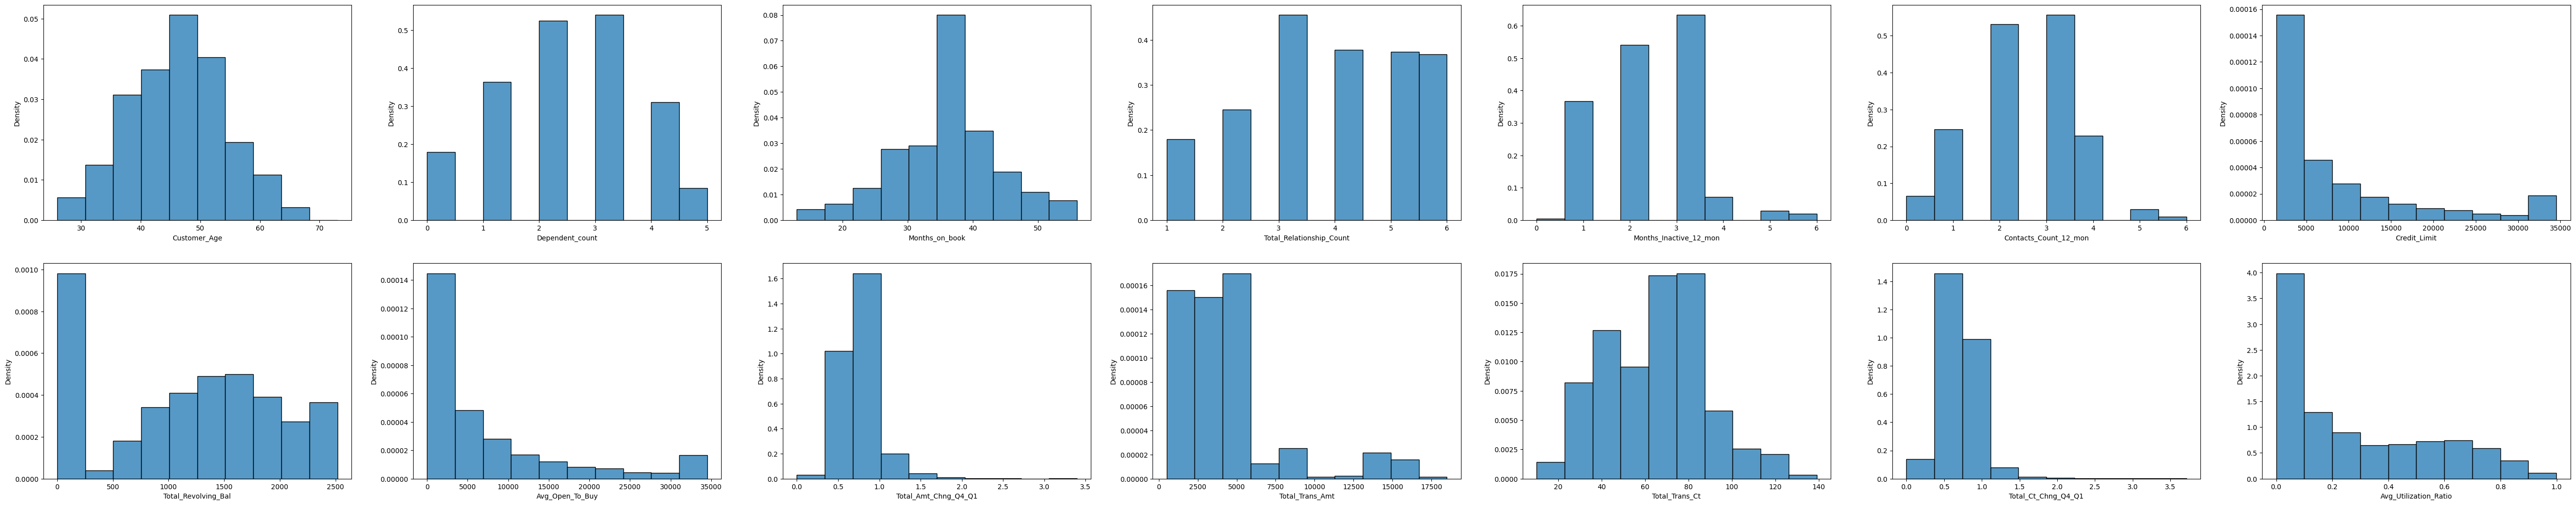

In [ ]:
hist_plot()

<Figure size 900x1000 with 0 Axes>

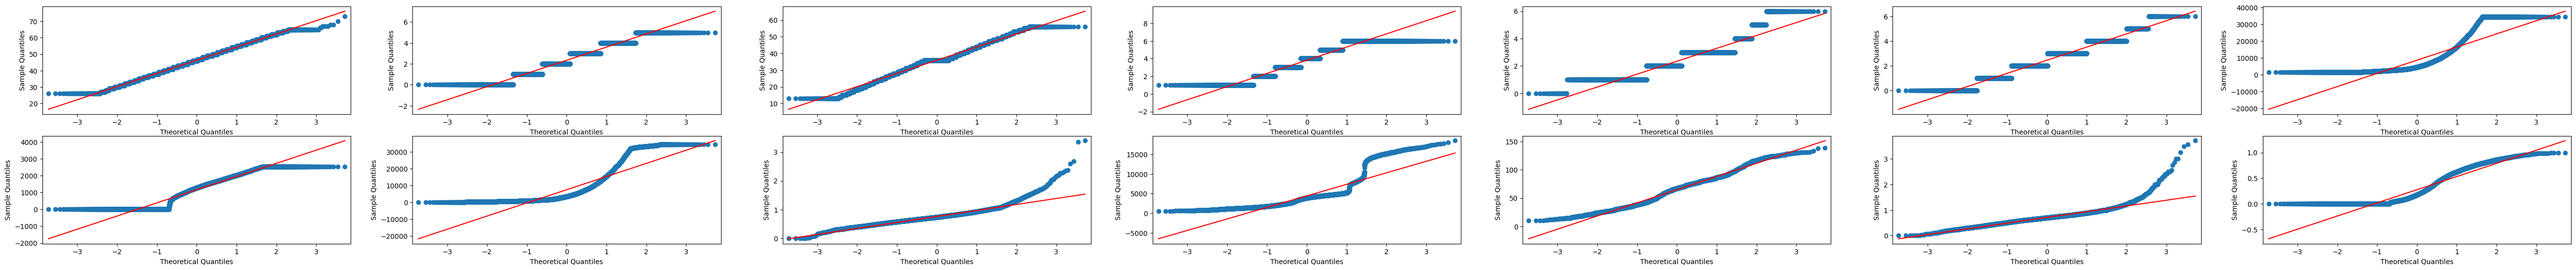

In [ ]:
qq_plot()

In [ ]:
categorical_columns = bank_data.select_dtypes(include='object').columns.to_list()

In [ ]:
bank_data[categorical_columns]

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue
...,...,...,...,...,...,...
10122,Existing Customer,M,Graduate,Single,$40K - $60K,Blue
10123,Attrited Customer,M,Unknown,Divorced,$40K - $60K,Blue
10124,Attrited Customer,F,High School,Married,Less than $40K,Blue
10125,Attrited Customer,M,Graduate,Unknown,$40K - $60K,Blue


In [ ]:
print('Value count of each unique value in categorical columns of bank data:')

for i in categorical_columns:
  print(bank_data[i].value_counts())
  print("--"*20)

Value count of each unique value in categorical columns of bank data:
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
----------------------------------------
F    5358
M    4769
Name: Gender, dtype: int64
----------------------------------------
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
----------------------------------------
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
----------------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
----------------------------------------
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
----------------------

In [ ]:
def groupby_data(cat_cols):
  print(bank_data.query("Attrition_Flag=='Existing Customer'").groupby(cat_cols)['Attrition_Flag'].count())
  print("---"*12)
  print(bank_data.query("Attrition_Flag=='Attrited Customer'").groupby(cat_cols)['Attrition_Flag'].count())

In [ ]:
groupby_data('Marital_Status')

Marital_Status
Divorced     627
Married     3978
Single      3275
Unknown      620
Name: Attrition_Flag, dtype: int64
------------------------------------
Marital_Status
Divorced    121
Married     709
Single      668
Unknown     129
Name: Attrition_Flag, dtype: int64


In [ ]:
groupby_data('Gender')

Gender
F    4428
M    4072
Name: Attrition_Flag, dtype: int64
------------------------------------
Gender
F    930
M    697
Name: Attrition_Flag, dtype: int64


In [ ]:
groupby_data('Education_Level')

Education_Level
College           859
Doctorate         356
Graduate         2641
High School      1707
Post-Graduate     424
Uneducated       1250
Unknown          1263
Name: Attrition_Flag, dtype: int64
------------------------------------
Education_Level
College          154
Doctorate         95
Graduate         487
High School      306
Post-Graduate     92
Uneducated       237
Unknown          256
Name: Attrition_Flag, dtype: int64


In [ ]:
groupby_data('Income_Category')

Income_Category
$120K +            601
$40K - $60K       1519
$60K - $80K       1213
$80K - $120K      1293
Less than $40K    2949
Unknown            925
Name: Attrition_Flag, dtype: int64
------------------------------------
Income_Category
$120K +           126
$40K - $60K       271
$60K - $80K       189
$80K - $120K      242
Less than $40K    612
Unknown           187
Name: Attrition_Flag, dtype: int64


In [ ]:
groupby_data('Card_Category')

Card_Category
Blue        7917
Gold          95
Platinum      15
Silver       473
Name: Attrition_Flag, dtype: int64
------------------------------------
Card_Category
Blue        1519
Gold          21
Platinum       5
Silver        82
Name: Attrition_Flag, dtype: int64
